In [5]:
library(dplyr)
library(ggplot2)
library(grid)
library(gridExtra)
library(reshape2)

df.train = tbl_df(read.csv("../../data/train.csv", stringsAsFactors = FALSE))
df.test = tbl_df(read.csv("../../data/test.csv", stringsAsFactors = FALSE))
df.combined = rbind(within(df.train, rm('Id','SalePrice')), within(df.test, rm('Id')))

df.lot.frontage = df.combined %>% select(LotFrontage, ScreenPorch) %>% na.omit()
dim(df.lot.frontage)

[1] 2433    2

In [26]:
tmp = df.lot.frontage %>% group_by(ScreenPorchIsNotZero=(ScreenPorch > 0)) %>% 
        summarise(n(), meanLotFrontage=mean(LotFrontage))
print(tmp)

# A tibble: 2 x 3
  ScreenPorchIsNotZero `n()` meanLotFrontage
                 <lgl> <int>           <dbl>
1                FALSE  2220        68.76126
2                 TRUE   213        74.98122


[1] 213   4

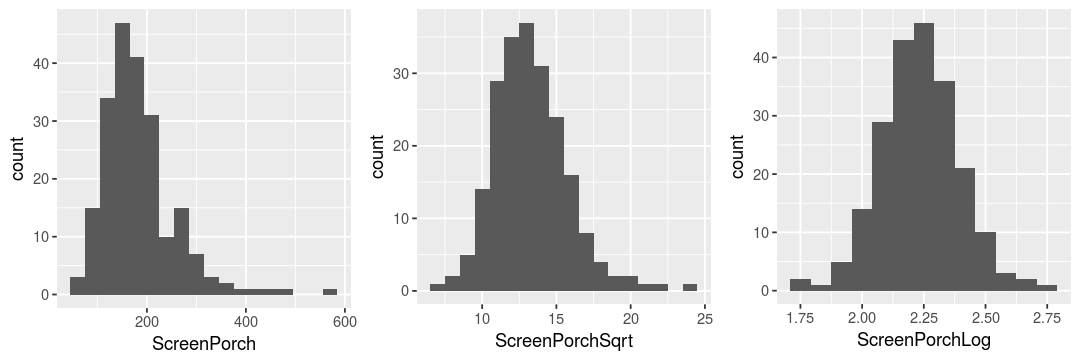

In [46]:
tmp = df.lot.frontage %>% filter(ScreenPorch > 0) %>% 
      mutate(ScreenPorchSqrt=ScreenPorch^0.5, ScreenPorchLog=log10(ScreenPorch))

dim(tmp)

options(repr.plot.width = 9, repr.plot.height = 3)
g1 = ggplot(tmp, aes(ScreenPorch)) + geom_histogram(binwidth = 30)
g2 = ggplot(tmp, aes(ScreenPorchSqrt)) + geom_histogram(binwidth = 1)
g3 = ggplot(tmp, aes(ScreenPorchLog)) + geom_histogram(binwidth = 1/12)

grid.arrange(g1, g2, g3, layout_matrix=rbind(c(1, 2, 3)))